In [202]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
yelp_path = ("../__DATA__/sentiment labelled sentences/yelp_labelled.txt")
amz_path = ("../__DATA__/sentiment labelled sentences/amazon_cells_labelled.txt")
imdb_path = ("../__DATA__/sentiment labelled sentences/imdb_labelled.txt")
#f = open(data_path)
amzraw = pd.read_csv(amz_path, delimiter='\t',header=None)
amzraw.columns = ['sentence','positivity']
amzraw.head()

,sentence,positivity
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [204]:
punctuation

['.', '!', '?', ',']

In [205]:
punctuation = ['.','!','?',',']
for p in punctuation:
    df2=amzraw['sentence'].str.replace(p,' ')
    df2=pd.DataFrame(df2)
    amzraw['sentence'] = df2
amzraw.shape

(1000, 2)

In [206]:
from sklearn.naive_bayes import BernoulliNB

In [207]:
keys = ['good','great','excellent','must have','impressed','recommend','love','best', 'nice', 'beautiful',
        'waste','disappoint','junk','not', 'happy', 'eas', 'well','fine','joy', 'satis', 'like', 'sweet', 'wow']
amzfeats = pd.DataFrame(amzraw['positivity'])
for key in keys:
    amzfeats[str(key)] = amzraw.sentence.str.contains(str(key), case=False)

#setting data
data = amzfeats[keys]
target = amzfeats['positivity']

#testing classifier
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 215


In [208]:
#Filter out negative reviews
#amzraw[amzraw['positivity'] == 1]['sentence']

In [209]:
amzraw['sentence'][956]

'Just reading on the specs alone makes you say WOW '

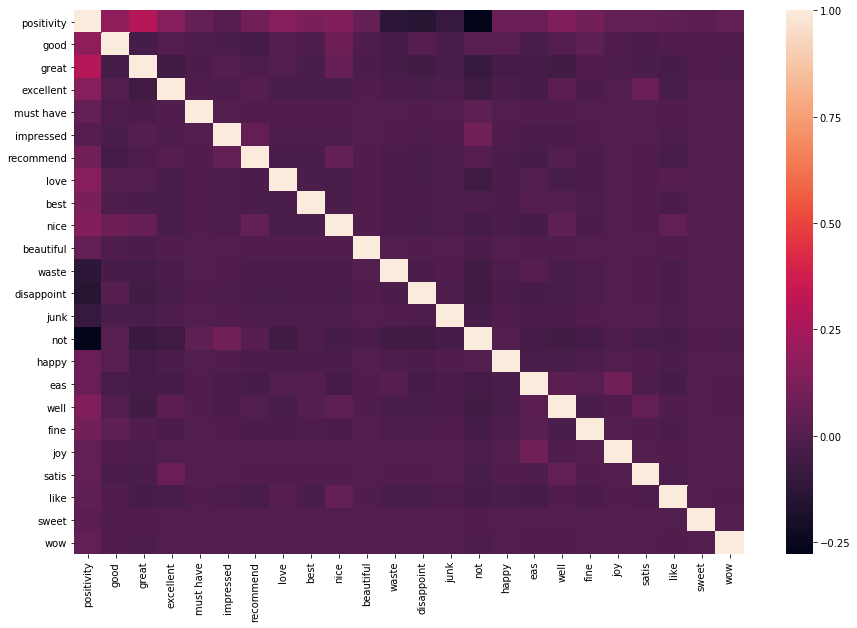

In [210]:
plt.figure(figsize=(15,10))
sns.heatmap(amzfeats.corr())

In [211]:
def revclasseval(path):
    raw = pd.read_csv(path, delimiter='\t',header=None)
    raw.columns = ['sentence','positivity']
    
    punctuation = ['.','!','?',',']
    for p in punctuation:
        df2=raw['sentence'].str.replace(p,' ')
        df2=pd.DataFrame(df2)
        raw['sentence'] = df2
        
    keys = ['good','great','excellent','must have','impressed','recommend','love','best', 'nice', 'beautiful',
        'waste','disappoint','junk','not', 'happy', 'eas', 'well','fine','joy', 'satis', 'like', 'sweet', 'wow']
    
    feats = pd.DataFrame(raw['positivity'])
    for key in keys:
        feats[str(key)] = raw.sentence.str.contains(str(key), case=False)

    #setting data
    data = feats[keys]
    target = feats['positivity']

    #testing classifier
    bnb = BernoulliNB()
    bnb.fit(data, target)
    y_pred = bnb.predict(data)
    print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))

In [212]:
revclasseval(yelp_path)

Number of mislabeled points out of a total 1000 points : 300


In [195]:
revclasseval(imdb_path)

Number of mislabeled points out of a total 748 points : 261


In [213]:
revclasseval(amz_path)

Number of mislabeled points out of a total 1000 points : 215


In [214]:
z = range(10)

In [201]:
#Drill from Unit 2 Lesson 3.3: Cross Validation 
# Implement your own cross validation with your spam model.
cross_val_scores = []
folds = 10
index = round(len(data)/folds)
for i in range(folds):
    X_train = data[index*(i):index*(i+1)]
    y_train = target[index*(i):index*(i+1)]
    
    mask = np.ones(len(data), np.bool)
    mask[index*(i):index*(i+1)] = 0
    
    X_test = data[mask]
    y_test = target[mask]
    
    score = bnb.fit(X_train, y_train).score(X_test, y_test)
    cross_val_scores.append(score)
cross_val_scores

range(0, 10)

# Classifier Iterations

## Iteration 1
Using the same keys and features as in the previous drill when this classier was originally produced.

In [229]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV

In [237]:
def RevClassEvalIter(path, keys):
    raw = pd.read_csv(path, delimiter='\t',header=None)
    raw.columns = ['review','positivity']
    
    punctuation = ['.','!','?',',']
    for p in punctuation:
        df2=raw['review'].str.replace(p,' ')
        df2=pd.DataFrame(df2)
        raw['review'] = df2
    
    feats = pd.DataFrame(raw['positivity'])
    for key in keys:
        feats[str(key)] = raw.review.str.contains(str(key), case=False)

    #setting data
    data = feats[keys]
    target = feats['positivity']

    #testing classifier
    bnb = BernoulliNB()
    bnb.fit(data, target)
    y_pred = bnb.predict(data)
    print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
    print('')
    
    #Checking for overfitting
    CVarray = cross_val_score(bnb, data, target, cv=10)
    print('Accuracies of various holdout groups in the data')
    print(CVarray)
    
    #Evaluating importance of each feature/keyword using lasso model
    X = data
    y = target
    reg = LassoCV()
    reg.fit(X, y)
    coef = pd.Series(reg.coef_, index = X.columns)
    imp_coef = coef.sort_values()
    plt.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")

Number of mislabeled points out of a total 1000 points : 215

Accuracies of various holdout groups in the data
[0.87 0.75 0.8  0.75 0.82 0.75 0.8  0.71 0.81 0.72]


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


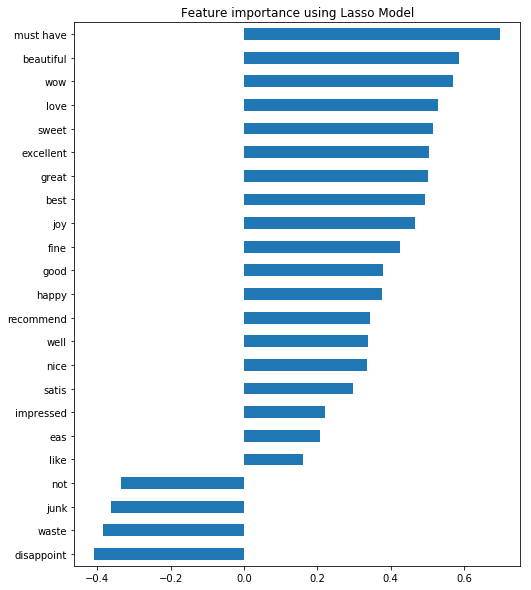

In [238]:
keys = ['good','great','excellent','must have','impressed','recommend','love','best', 'nice', 'beautiful',
        'waste','disappoint','junk','not', 'happy', 'eas', 'well','fine','joy', 'satis', 'like', 'sweet', 'wow']

RevClassEvalIter(amz_path, keys=keys)

Using cross validation with ten folds, it's apparent that this model tends to overfit because different holdout groups with the sample of reviews show different accuracy measures of the model. (e.g. 0.87 vs. 0.71)

## Iteration 2
Using only positive words

Number of mislabeled points out of a total 1000 points : 241

Accuracies of various holdout groups in the data
[0.86 0.74 0.8  0.73 0.76 0.73 0.71 0.7  0.78 0.7 ]


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


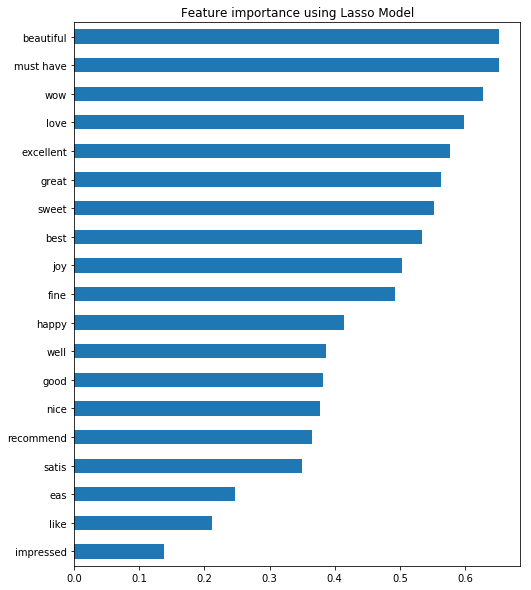

In [251]:
keys = ['good','great','excellent','must have','impressed','recommend','love','best', 'nice', 'beautiful',
        'happy', 'eas', 'well','fine','joy', 'satis', 'like', 'sweet', 'wow']

RevClassEvalIter(amz_path, keys=keys)

Less accuracy for each fold, and a cross validation still shows that there is overfitting.

## Iteration 3
Using only negative words

Number of mislabeled points out of a total 1000 points : 316

Accuracies of various holdout groups in the data
[0.7  0.71 0.7  0.69 0.75 0.62 0.63 0.63 0.68 0.69]


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


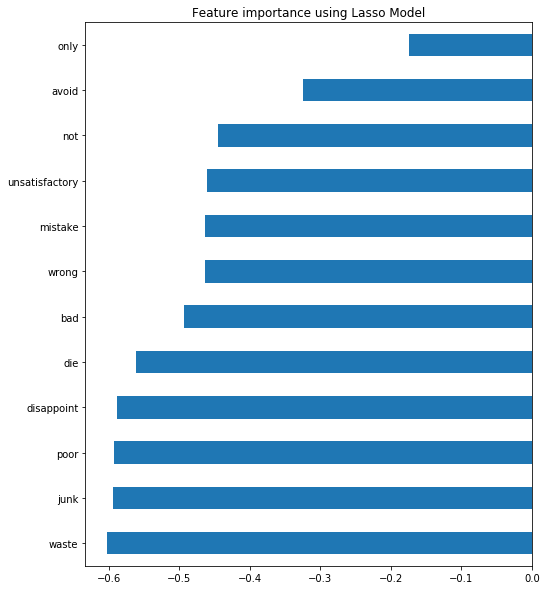

In [252]:
keys = ['waste','disappoint','junk','not', 'poor', 'unsatisfactory', 'bad', 'wrong', 'only', 'die', 'mistake', 'avoid']

RevClassEvalIter(amz_path, keys=keys)

While accuracy seems better using positive words, using negative words on the other hand improved crossvalidation scores to control for over fitting

In [253]:
#amzraw[amzraw['positivity'] == 0]

## Iteration 4
Using both positive and negative words while also adding an 'all caps' feature

In [266]:
def RevClassEvalIter_1(path, keys):
    raw = pd.read_csv(path, delimiter='\t',header=None)
    raw.columns = ['review','positivity']
    
    punctuation = ['.','!','?',',']
    for p in punctuation:
        df2=raw['review'].str.replace(p,' ')
        df2=pd.DataFrame(df2)
        raw['review'] = df2
    
    feats = pd.DataFrame(raw['positivity'])
    for key in keys:
        feats[str(key)] = raw.review.str.contains(str(key), case=False)
    
    feats['all_caps'] = raw.review.str.isupper()
    
    #setting data
    data = feats.iloc[:,1:len(feats.columns)]
    target = feats['positivity']

    #testing classifier
    bnb = BernoulliNB()
    bnb.fit(data, target)
    y_pred = bnb.predict(data)
    print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
    print('')
    
    #Checking for overfitting
    CVarray = cross_val_score(bnb, data, target, cv=10)
    print('Accuracies of various holdout groups in the data')
    print(CVarray)
    
    #Evaluating importance of each feature/keyword using lasso model
    X = data
    y = target
    reg = LassoCV()
    reg.fit(X, y)
    coef = pd.Series(reg.coef_, index = X.columns)
    imp_coef = coef.sort_values()
    plt.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")

Number of mislabeled points out of a total 1000 points : 215

Accuracies of various holdout groups in the data
[0.87 0.74 0.8  0.77 0.82 0.76 0.8  0.71 0.8  0.73]


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


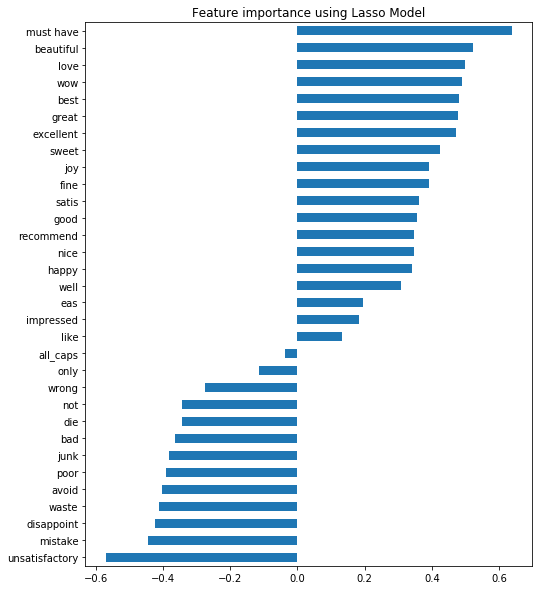

In [267]:
keys = ['good','great','excellent','must have','impressed','recommend','love','best', 'nice', 'beautiful',
        'happy', 'eas', 'well','fine','joy', 'satis', 'like', 'sweet', 'wow', 'waste','disappoint','junk',
        'not', 'poor', 'unsatisfactory', 'bad', 'wrong', 'only', 'die', 'mistake', 'avoid']

RevClassEvalIter_1(amz_path, keys=keys)

Trying to find reviews with all capital letters did not help very much, and it appears that introducing some positive words actually makes overfitting more likely, rather than just having positive words alone.

## Iteration 5
Removing the all_caps feature, including positive and negative words, and removing positive words that contribute to overfitting.

Number of mislabeled points out of a total 1000 points : 213

Accuracies of various holdout groups in the data
[0.87 0.74 0.8  0.77 0.83 0.76 0.8  0.71 0.8  0.73]


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


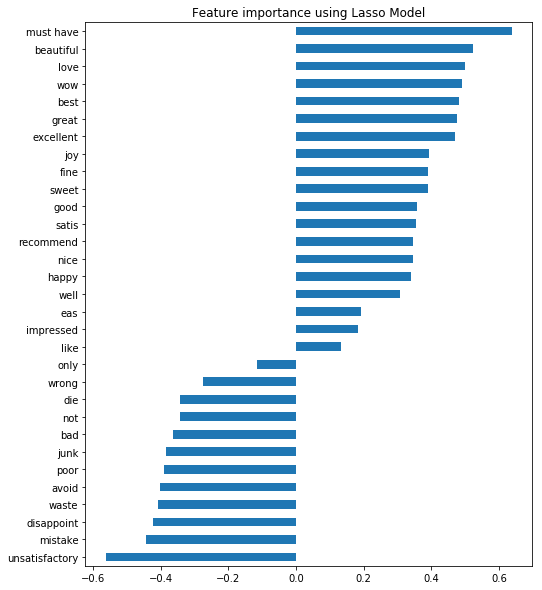

In [271]:
keys = ['good',
        'great',
        'excellent',
        'must have',
        'impressed',
        'recommend',
        'love',
        'best',
        'nice',
        'beautiful',
        'happy', 
        'eas', 
        'well',
        'fine',
        'joy', 
        'satis', 
        'like', 
        'sweet', 
        'wow', 
        'waste',
        'disappoint','junk',
        'not', 'poor', 'unsatisfactory', 'bad', 'wrong', 'only', 'die', 'mistake', 'avoid']

RevClassEvalIter(amz_path, keys=keys)